In [1]:
import pandas as pd
import numpy as np
import pickle
import gzip
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from load_file import load_dataframes
from data_cleaning import *
import seaborn as sns
%load_ext autoreload
from scipy import stats
%autoreload 2

In [2]:
#path to the folder data, containing RateBeer and BeerAdvocate folder with original datasets
FOLDER_PATH = "/Users/manuelcurnis/Desktop/EPFL first semester/Applied Data Analysis/data"

In [3]:
beer_RB, breweries_RB, users_RB, ratings_RB, tagged_RB, beer_BA, breweries_BA, users_BA, ratings_BA, tagged_BA= load_dataframes(FOLDER_PATH)

format attributes of dataframes

In [4]:
#format attributes of ratings dataframe
ratings_RB = format_attribute_ratings(ratings_RB)
ratings_BA = format_attribute_ratings(ratings_BA)

In [5]:
ratings_RB.dtypes

beer_name               object
beer_id                  int64
brewery_name            object
brewery_id               int64
style                   object
abv                    float64
date            datetime64[ns]
user_name               object
user_id                 object
appearance             float64
aroma                  float64
palate                 float64
taste                  float64
overall                float64
rating                 float64
text                    object
dtype: object

In [6]:
ratings_BA.dtypes

beer_name               object
beer_id                  int64
brewery_name            object
brewery_id               int64
style                   object
abv                    float64
date            datetime64[ns]
user_name               object
user_id                 object
appearance             float64
aroma                  float64
palate                 float64
taste                  float64
overall                float64
rating                 float64
text                    object
review                    bool
dtype: object

In [7]:
#format attributes of breweries dataframe
breweries_RB = format_attribute_breweries(breweries_RB)
breweries_BA = format_attribute_breweries(breweries_BA)

In [8]:
#format attributes of tagged dataframe
tagged_BA=format_attribute_tagged(tagged_BA)
tagged_RB=format_attribute_tagged(tagged_RB)

In [9]:
#format attributes of beers dataframe
beer_RB = format_attribute_beers(beer_RB)
beer_BA = format_attribute_beers_BA(beer_BA)

In [10]:
beer_RB.dtypes

beer_id                        int64
beer_name                     object
brewery_id                     int64
brewery_name                  object
style                         object
nbr_ratings                    int64
overall_score                float64
style_score                  float64
avg                          float64
abv                          float64
avg_computed                 float64
zscore                       float64
nbr_matched_valid_ratings      int64
avg_matched_valid_ratings    float64
dtype: object

In [11]:
beer_BA.dtypes

beer_id                        int64
beer_name                     object
brewery_id                     int64
brewery_name                  object
style                         object
nbr_ratings                    int64
nbr_reviews                    int64
avg                          float64
ba_score                     float64
bros_score                   float64
abv                          float64
avg_computed                 float64
zscore                       float64
nbr_matched_valid_ratings      int64
avg_matched_valid_ratings    float64
dtype: object

In [12]:
#format attributes of users dataframes
users_RB = format_attribute_users(users_RB)
users_BA = format_attribute_users(users_BA)

In [13]:
users_RB.dtypes

nbr_ratings             int64
user_id                object
user_name              object
joined         datetime64[ns]
location               object
dtype: object

In [14]:
users_BA.dtypes

nbr_ratings             int64
nbr_reviews             int64
user_id                object
user_name              object
joined         datetime64[ns]
location               object
dtype: object

analyse the dataframes individually to see whether the keys have unique values, whether there are nan or invalid values and so on

In [15]:
users_BA['user_id'].is_unique

True

In [16]:
users_RB['user_id'].is_unique

False

In [17]:
#in users_RB there are users with same user_id, that should not be possible

In [17]:
#show duplicated
users_RB_duplicate = users_RB[users_RB.duplicated(subset='user_id', keep=False)]
users_RB_duplicate.sort_values(by='user_id').head(20)

,nbr_ratings,user_id,user_name,joined,location
40757,1,3070,"<span class=""__cf_email__"" data-cfemail=""d092b...",2002-01-26,"United States, Ohio"
40317,1,3070,"<span class=""__cf_email__"" data-cfemail=""a6e4c...",2002-01-26,"United States, Ohio"
15105,1,3070,"<span class=""__cf_email__"" data-cfemail=""56143...",2002-01-26,"United States, Ohio"
55743,1,3070,"<span class=""__cf_email__"" data-cfemail=""8bc9e...",2002-01-26,"United States, Ohio"
52625,1,3070,"<span class=""__cf_email__"" data-cfemail=""b4f6d...",2002-01-26,"United States, Ohio"
51330,1,23090,"<span class=""__cf_email__"" data-cfemail=""73191...",2005-06-14,"United States, Virginia"
56435,1,23090,"<span class=""__cf_email__"" data-cfemail=""69030...",2005-06-14,"United States, Virginia"
1176,1,46797,"<span class=""__cf_email__"" data-cfemail=""2b494...",2006-12-19,"United States, Arkansas"
49379,1,46797,"<span class=""__cf_email__"" data-cfemail=""0c6e6...",2006-12-19,"United States, Arkansas"
49388,1,46797,"<span class=""__cf_email__"" data-cfemail=""98faf...",2006-12-19,"United States, Arkansas"


we can see that user_id duplicated refers to the same person beacuse the joindate is the same and also the country is the same

In [18]:
users_RB = users_RB.drop_duplicates(subset='user_id', keep='first')

In [19]:
users_RB['user_id'].is_unique

True

let's take a look at reviews dataframes.
since we are interested in the text of reviews, check if there are NaN / empy reviews

In [20]:
#add a column review, True if there is a valid text (i.e a non null and not empty review), false otherwise
ratings_RB['review']=ratings_RB['text'].apply(lambda text: pd.notna(text) and str(text).strip() != '')

In [21]:
#here column review already exists, let's check if it is correcgt
ratings_BA['review']=ratings_BA['text'].apply(lambda text: pd.notna(text) and str(text).strip() != '')

In [22]:
len(ratings_RB)

7122074

In [23]:
len(ratings_BA)

8393032

In [24]:
len(ratings_RB[ratings_RB['review']==False])

448

In [25]:
len(ratings_BA[ratings_BA['review']==False])

5677323

In [99]:
#check if appearance, aroma, palate, taste ,overall,rating columns contain NaN values

In [27]:
#ratebeer
print(ratings_RB['aroma'].isna().sum())
print(ratings_RB['appearance'].isna().sum())
print(ratings_RB['palate'].isna().sum())
print(ratings_RB['taste'].isna().sum())
print(ratings_RB['overall'].isna().sum())
print(ratings_RB['rating'].isna().sum())

0
0
0
0
0
0


In [26]:
#beerAdvocatte
print(ratings_BA['aroma'].isna().sum())
print(ratings_BA['appearance'].isna().sum())
print(ratings_BA['palate'].isna().sum())
print(ratings_BA['taste'].isna().sum())
print(ratings_BA['overall'].isna().sum())
print(ratings_BA['rating'].isna().sum())

3623357
3623357
3623357
3623357
3623357
0


In [27]:
#if appearance	aroma	palate	taste	overall and review are all false i can delete the row
ratings_BA = ratings_BA.dropna(subset=['appearance', 'aroma', 'palate', 'taste', 'overall'], how='all')

In [28]:
#check  NaN values remaining
print(ratings_BA['aroma'].isna().sum())
print(ratings_BA['appearance'].isna().sum())
print(ratings_BA['palate'].isna().sum())
print(ratings_BA['taste'].isna().sum())
print(ratings_BA['overall'].isna().sum())
print(ratings_BA['rating'].isna().sum())

0
0
0
0
0
0


let's see if users make review of same beer on same date

In [29]:
#beer advocate
reviews_same_day_BA = ratings_BA[ratings_BA.duplicated(subset=['user_id', 'beer_id',  'date'], keep=False)]
reviews_same_day_BA.sort_values(by='user_id')

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review


In [30]:
#ratebeer
reviews_same_day_RB = ratings_RB[ratings_RB.duplicated(subset=['user_id', 'beer_id', 'brewery_id', 'date'], keep=False)]
reviews_same_day_RB.sort_values(by='user_id').head(20)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
3010639,FiftyFifty Imperial Eclipse Stout - Coffee / J...,194549,FiftyFifty Brewing Company,8711,Imperial Stout,11.9,2013-01-18,jethrodium,103703,4.0,10.0,4.0,9.0,18.0,4.5,650 ml bottle. Pours a dark cola brown with a...,True
3010637,FiftyFifty Imperial Eclipse Stout - Coffee / J...,194549,FiftyFifty Brewing Company,8711,Imperial Stout,11.9,2013-01-18,jethrodium,103703,4.0,10.0,4.0,9.0,18.0,4.5,650 ml bottle. Pours a dark cola brown with a...,True
5856285,St. Austell Tribute (Cask),45100,St. Austell,1033,Bitter,4.2,2011-04-18,Meilby,111918,3.0,7.0,3.0,6.0,13.0,3.2,"Cask @ The Wharf, Aalborg, DenmarkPours clear ...",True
5856284,St. Austell Tribute (Cask),45100,St. Austell,1033,Bitter,4.2,2011-04-18,Meilby,111918,3.0,7.0,3.0,6.0,13.0,3.2,"Cask @ The Wharf, Aalborg, DenmarkPours clear ...",True
578519,Menabrea (La 150°) 1846 / Birra Bionda,5369,Menabrea (Forst),979,Pale Lager,4.8,2015-06-08,jamaty,131219,3.0,6.0,3.0,5.0,10.0,2.7,"Dorada clara, espuma normal. Aroma muy cereal....",True
578520,Menabrea (La 150°) 1846 / Birra Bionda,5369,Menabrea (Forst),979,Pale Lager,4.8,2015-06-08,jamaty,131219,3.0,5.0,2.0,4.0,6.0,2.0,Dorada cristalina. Espuma normal que desaparec...,True
2836951,AleSmith Grand Cru,2488,AleSmith Brewing Company,432,Belgian Strong Ale,10.0,2012-04-20,MotherBrother,132360,3.0,8.0,3.0,7.0,17.0,3.8,"Pour clear red/dark orange, with a huge creamy...",True
2836950,AleSmith Grand Cru,2488,AleSmith Brewing Company,432,Belgian Strong Ale,10.0,2012-04-20,MotherBrother,132360,3.0,8.0,3.0,7.0,17.0,3.8,"Pour clear red/dark orange, with a huge creamy...",True
1065227,Erdinger Dunkel,2469,Erdinger Weissbräu,425,Dunkelweizen,5.3,2014-07-20,adster,138566,3.0,6.0,3.0,5.0,14.0,3.1,"VÃ¶rÃ¶sesbarna szÃ­nű, opÃ¡los főzet egy piszk...",True
1065226,Erdinger Dunkel,2469,Erdinger Weissbräu,425,Dunkelweizen,5.3,2014-07-20,adster,138566,3.0,6.0,3.0,5.0,14.0,3.1,"VÃ¶rÃ¶sesbarna szÃ­nű, opÃ¡los főzet egy piszk...",True


we can see there are users who make the  same review on the same beer in the same brewerie in the same date, we can only keep the firts one

In [31]:
ratings_RB = ratings_RB.drop_duplicates(subset=['user_id', 'beer_id',  'date'], keep='first')

In [32]:
#let's check if we have removed all the duplicates correctly
reviews_same_day_RB = ratings_RB[ratings_RB.duplicated(subset=['user_id', 'beer_id',  'date'], keep=False)]
reviews_same_day_RB.sort_values(by='user_id')

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review


In [33]:
ratings_RB['text'].describe()

count                                               7121601
unique                                              7094097
top       Backlog, ocena przepisana z untappd, w ramach ...
freq                                                   1016
Name: text, dtype: object

let's check if there are reviews with same text

In [34]:
#ratebeer 
ratings_RB_text = ratings_RB[ratings_RB['review']==True]
same_text_review_RB = ratings_RB_text[ratings_RB_text.duplicated(subset=['text'], keep=False)]
same_text_review_RB.sort_values(by='user_id')

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
6943755,St. Bernardus Abt 12,2530,St. Bernardus Brouwerij,439,Abt/Quadrupel,10.0,2010-02-12,BigMike,100012,4.0,8.0,4.0,8.0,16.0,4.0,My bro offered me a beer and it was either thi...,True
3865935,Blue Moon Full Moon Winter Ale,79543,Coors Brewing Company &#40;MillerCoors&#41;,113,Belgian Ale,5.6,2010-02-12,BigMike,100012,3.0,5.0,4.0,5.0,11.0,2.8,My bro offered me a beer and it was either thi...,True
1598437,Mahou Negra,14864,Mahou (Grupo Mahou-San Miguel),1451,Dunkel/Tmavý,5.5,2003-10-05,caesar,1001,4.0,5.0,3.0,5.0,12.0,2.9,"Clear brown/black color, small head, brown lac...",True
142266,Schoune La Trip des Schoune,5346,Ferme Brasserie Schoune,902,Belgian Strong Ale,8.0,2010-05-26,caesar,1001,3.0,4.0,2.0,4.0,8.0,2.1,Bottled @ Copenhagen 2010. Big buttery mess. I...,True
142223,Schoune La Porter,88420,Ferme Brasserie Schoune,902,Porter,5.0,2010-05-26,caesar,1001,3.0,4.0,2.0,4.0,8.0,2.1,Bottled @ Copenhagen 2010. Big buttery mess. I...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576404,Cruzcampo Light,80259,Cruzcampo (Heineken España),873,Low Alcohol,2.4,2010-01-06,Pedrojcai,99567,1.0,1.0,1.0,1.0,1.0,0.5,"Poor, no aroma neither taste. Really it doesâ...",True
1963238,La Trappe Quadrupel,4565,La Trappe Trappist - Abdij O.L.V. Koningshoeve...,780,Abt/Quadrupel,10.0,2010-01-06,Pedrojcai,99567,4.0,8.0,5.0,6.0,15.0,3.8,"Great body, and fruit, strong taste in order t...",True
6040457,Daleside Old Leg Over,5504,Daleside,1001,Bitter,4.1,2005-01-10,Garrat,9963,3.0,5.0,3.0,5.0,14.0,3.0,"A fair pint,a bit of a thin head,not very acti...",True
3407772,Trade Route Pandan Brown Ale,82593,Northwest Brewing Company,9097,Brown Ale,6.0,2010-02-11,deadoralive,99697,5.0,10.0,5.0,10.0,20.0,5.0,Clear chestnut color with a fleeting head. Nic...,True


In [35]:
#beeradvocate
ratings_BA_text = ratings_BA[ratings_BA['review']==True]
same_text_review_BA = ratings_BA_text[ratings_BA_text.duplicated(subset=['text'], keep=False)]
same_text_review_BA.sort_values(by='user_id')

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
2698265,Tart Of Darkness With Cherries & Vanilla,134393,The Bruery,16866,American Wild Ale,7.1,2015-03-22,-Rick,-rick.912339,4.50,4.50,4.50,4.75,4.50,4.60,This beer is like regular Oude on steroids. H...,True
2672740,Oude Tart With Sour Cherries,63724,The Bruery,16866,American Wild Ale,7.5,2015-07-20,-Rick,-rick.912339,4.00,4.50,4.25,4.50,4.50,4.45,This beer is like regular Oude on steroids. H...,True
7967782,Cantillon Fou' Foune,5281,Brasserie Cantillon,388,Lambic - Fruit,5.0,2017-05-17,123moops,123moops.1200448,4.50,4.50,5.00,5.00,5.00,4.85,Unreal,True
5756144,Crusher,114804,The Alchemist,46317,American Double / Imperial IPA,9.0,2014-12-23,1424IpA,1424ipa.701739,4.50,4.00,4.00,4.25,4.25,4.18,Great beer from a great brewery.,True
5396832,Saison Du BUFF,60785,Dogfish Head Brewings & Eats,64,Saison / Farmhouse Ale,6.8,2010-10-25,1759Girl,1759girl.131568,4.00,5.00,3.00,5.00,4.00,4.54,"Saison du BUFFAppearance- very hazy golden, li...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268667,Rampant Imperial IPA,90410,New Belgium Brewing,192,American Double / Imperial IPA,8.5,2016-05-19,zotzot,zotzot.948941,3.75,3.75,3.75,4.00,3.75,3.85,Pretty good,True
1876795,Sierra Nevada Southern Hemisphere Harvest Fres...,42533,Sierra Nevada Brewing Co.,140,American IPA,6.7,2011-07-05,zrab11,zrab11.543838,4.00,3.50,4.00,4.50,4.50,4.18,A- Pours a Nice orangish color with a nice thi...,True
1896532,Sierra Nevada Torpedo Extra IPA,30420,Sierra Nevada Brewing Co.,140,American IPA,7.2,2011-03-05,zrab11,zrab11.543838,4.00,3.50,3.50,4.00,4.00,3.83,A-Pours a orangish yellow color with nice 1 fi...,True
1809164,Northern Hemisphere Harvest Wet Hop IPA,6549,Sierra Nevada Brewing Co.,140,American IPA,6.7,2011-04-19,zrab11,zrab11.543838,4.00,3.50,4.00,4.50,4.50,4.18,A- Pours a Nice orangish color with a nice thi...,True


Since the beer datasets are confusing and since we cleaned the dataframes with ratings by removing reviews with NaN values, we can recalculate the interesting values

In [36]:
ratings_RB['date'].dt.year.value_counts()

date
2015    842668
2014    814680
2016    813568
2013    703811
2012    580998
2017    485108
2011    458161
2009    404950
2008    400288
2010    397754
2007    357233
2006    263995
2005    219132
2004    166266
2003    113425
2002     78746
2001     18572
2000      2694
Name: count, dtype: int64

In [37]:
ratings_BA['date'].dt.year.value_counts()

date
2015    1286137
2016     924219
2017     412415
2011     327138
2010     270958
2012     233390
2009     233241
2014     224832
2013     201766
2008     194851
2007     128739
2006     116197
2005      79333
2004      62993
2003      50511
2002      20811
2001       1816
1998        134
2000        110
1999         83
1996          1
Name: count, dtype: int64

In [38]:
ratings_RB_grouped_beer = ratings_RB.groupby(['beer_id'])[['appearance', 'aroma', 'palate', 'taste', 'overall','rating']].agg(
    nbr_ratings=('overall', 'size'),
    aroma_mean=('aroma', 'mean'),
    aroma_std=('aroma', 'std'),
    palate_mean=('palate', 'mean'),
    palate_std=('palate', 'std'),
    taste_mean=('taste', 'mean'),
    taste_std=('taste', 'std'),
    overall_mean=('overall', 'mean'),
    overall_std=('overall', 'std')
)

ratings_RB_grouped_beer

,nbr_ratings,aroma_mean,aroma_std,palate_mean,palate_std,taste_mean,taste_std,overall_mean,overall_std
beer_id,,,,,,,,,
1,1059,6.125590,1.526792,3.396601,0.847228,6.555241,1.418724,13.615675,2.841859
2,915,5.007650,1.360970,2.816393,0.707226,5.284153,1.313172,10.829508,2.757009
3,682,5.596774,1.379583,3.098240,0.725473,5.835777,1.360016,11.794721,2.801631
4,427,5.449649,1.301559,3.053864,0.701710,5.681499,1.228270,11.707260,2.561180
5,566,5.687279,1.254830,2.853357,0.593219,5.475265,1.287897,11.287986,2.524940
...,...,...,...,...,...,...,...,...,...
536472,1,5.000000,NaN,3.000000,NaN,5.000000,NaN,9.000000,NaN
536473,1,3.000000,NaN,2.000000,NaN,3.000000,NaN,7.000000,NaN
536474,1,7.000000,NaN,4.000000,NaN,7.000000,NaN,14.000000,NaN


In [39]:
#this will delete beers with no reviews, in which we are not interested
beer_RB_extract = beer_RB[['beer_id', 'beer_name','brewery_id','brewery_name','style']]
beer_RB_merged =pd.merge(beer_RB_extract, ratings_RB_grouped_beer, left_on='beer_id', right_index=True, how="inner")
beer_RB_merged

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,aroma_mean,aroma_std,palate_mean,palate_std,taste_mean,taste_std,overall_mean,overall_std
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,4.000000,NaN,2.000000,NaN,4.000000,NaN,8.000000,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,3.700000,0.823273,2.200000,0.788811,3.500000,0.849837,6.900000,1.370320
2,19445,Régab,3198,Sobraga,Pale Lager,27,3.370370,1.713030,2.222222,0.800641,3.592593,1.759791,6.592593,3.319630
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,7.333333,0.516398,3.833333,1.169045,7.000000,1.095445,16.333333,1.751190
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,6.000000,NaN,3.000000,NaN,5.000000,NaN,12.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442076,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,3.000000,1.000000,1.400000,0.547723,2.800000,0.836660,5.200000,1.643168
442077,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,5.000000,NaN,3.000000,NaN,6.000000,NaN,12.000000,NaN
442078,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,3.000000,NaN,2.000000,NaN,4.000000,NaN,8.000000,NaN
442079,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,5.250000,0.500000,2.000000,0.000000,5.250000,0.500000,10.000000,0.000000


In [44]:
len(beer_RB_merged)

396690

In [40]:
#this will delete beers with no reviews, in which we are not interested
ratings_BA_grouped_beer = ratings_BA.groupby(['beer_id'])[['appearance', 'aroma', 'palate', 'taste', 'overall','rating']].agg(
    nbr_ratings=('overall', 'size'),
    aroma_mean=('aroma', 'mean'),
    aroma_std=('aroma', 'std'),
    palate_mean=('palate', 'mean'),
    palate_std=('palate', 'std'),
    taste_mean=('taste', 'mean'),
    taste_std=('taste', 'std'),
    overall_mean=('overall', 'mean'),
    overall_std=('overall', 'std')
)

ratings_BA_grouped_beer

,nbr_ratings,aroma_mean,aroma_std,palate_mean,palate_std,taste_mean,taste_std,overall_mean,overall_std
beer_id,,,,,,,,,
3,3,4.000000,0.500000,4.166667,0.288675,4.166667,0.288675,4.166667,0.288675
4,10,3.800000,0.586894,3.700000,0.752773,3.450000,0.831665,3.700000,0.674949
5,799,3.295369,0.571123,3.392991,0.593644,3.423029,0.610083,3.511890,0.596578
6,1362,3.571953,0.528016,3.582232,0.538329,3.683921,0.526521,3.709068,0.552468
7,1299,3.296959,0.682370,3.231909,0.656953,3.224788,0.713202,3.320824,0.716434
...,...,...,...,...,...,...,...,...,...
293285,1,3.750000,NaN,4.000000,NaN,3.500000,NaN,4.000000,NaN
293286,1,4.000000,NaN,3.750000,NaN,3.500000,NaN,3.750000,NaN
293294,1,4.000000,NaN,3.750000,NaN,4.000000,NaN,4.000000,NaN


In [41]:
beer_BA_extract = beer_BA[['beer_id', 'beer_name','brewery_id','brewery_name','style']]
beer_BA_merged =pd.merge(beer_BA_extract, ratings_BA_grouped_beer, left_on='beer_id', right_index=True, how="inner")
beer_BA_merged

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,aroma_mean,aroma_std,palate_mean,palate_std,taste_mean,taste_std,overall_mean,overall_std
23,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),Euro Pale Lager,1,2.750000,NaN,3.250000,NaN,2.750000,NaN,3.000000,NaN
24,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4,3.625000,0.250000,3.750000,0.288675,4.000000,0.000000,3.875000,0.478714
25,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,59,3.470339,0.525400,3.521186,0.553765,3.466102,0.496665,3.512712,0.552080
26,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,6,3.791667,0.600347,3.833333,0.683130,3.666667,0.408248,3.916667,0.491596
27,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,48,3.510417,0.520736,3.416667,0.441628,3.583333,0.429415,3.703125,0.501742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280814,19149,Diamond Stout,885,Summit Station Restaurant & Brewery,Irish Dry Stout,3,3.666667,0.763763,3.333333,1.154701,4.000000,1.000000,3.833333,0.763763
280816,19142,IPA,885,Summit Station Restaurant & Brewery,English India Pale Ale (IPA),2,3.250000,0.353553,3.500000,0.707107,3.000000,1.414214,3.500000,0.707107
280817,19141,Irvington Pale Ale,885,Summit Station Restaurant & Brewery,American Pale Ale (APA),3,3.333333,0.577350,4.000000,0.500000,3.500000,0.500000,3.833333,0.288675
280818,19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,2.666667,1.040833,2.500000,1.322876,2.666667,1.258306,2.833333,1.258306


In [42]:
len(beer_BA_merged)

233426

let's now add a tag to the ratings dataframe in order to get the language of the text

In [43]:
len(tagged_RB)

7122074

In [44]:
tagged_RB=tagged_RB.drop_duplicates(subset=['beer_id', 'date', 'user_id'], keep='first')

In [45]:
len(tagged_RB)

7122049

In [46]:
len(tagged_BA)

2589586

In [47]:
tagged_BA = tagged_BA.drop_duplicates(subset=['beer_id', 'date', 'user_id'], keep='first')

In [48]:
len(tagged_BA)

2589586

In [49]:
len(ratings_RB)

7122049

In [50]:
ratings_RB = pd.merge(ratings_RB, tagged_RB, left_on=['beer_id', 'date', 'user_id'],right_on=['beer_id', 'date', 'user_id'], how='left')

In [51]:
len(ratings_RB)

7122049

In [52]:
ratings_RB.head(5)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review,lang_tag
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26,Manslow,175852,2.0,4.0,2.0,4.0,8.0,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło...",True,pl
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2017-02-17,MAGICuenca91,442761,2.0,3.0,2.0,4.0,8.0,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...,True,es
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-06-24,Sibarh,288889,3.0,3.0,2.0,3.0,5.0,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni...",True,pl
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-01-01,fombe89,250510,4.0,3.0,1.0,2.0,5.0,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C...",True,es
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23,kevnic2008,122778,2.0,4.0,2.0,4.0,7.0,1.9,Many thanks for this beer to Erzengel. Pours l...,True,en


even if for now we are focusing on ratebeer dataframe, let's to the same for beeradvocate ratings dataframe

In [53]:
len(ratings_BA)

4769675

In [54]:
ratings_BA = pd.merge(ratings_BA, tagged_BA, left_on=['beer_id', 'date', 'user_id'],right_on=['beer_id', 'date', 'user_id'], how='left')

In [55]:
len(ratings_BA)

4769675

In [56]:
ratings_BA.head(5)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review,lang_tag
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True,en
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True,en
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2006-03-13,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True,en
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-12-01,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True,en
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-08-30,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True,en


In [57]:
len(ratings_BA[ratings_BA['review']==False])

2097002

update users dataframe with num of reviews per user and date of first review

In [58]:
ratings_group_by_user=ratings_BA.groupby('user_id')[['date']].agg(
    nbr_ratings=('date', 'size'),
    date_first_review=('date', 'min')
)
ratings_group_by_user

,nbr_ratings,date_first_review
user_id,,
-----kiki-----.1000245,2,2015-06-15
---.940711,3,2015-02-12
--dida--.1042029,3,2015-09-20
--dom--.709199,60,2012-12-25
--nomad--.931404,1,2015-01-22
...,...,...
zzachm18.1034947,89,2016-04-09
zzavela.1143039,20,2016-05-29
zzombie.658444,1,2012-12-20


In [59]:
#automaticcaly delete users with no reviews
users_BA_cleaned = users_BA[['user_id', 'user_name', 'joined','location']]
users_BA_cleaned=pd.merge(users_BA_cleaned, ratings_group_by_user, left_on='user_id', right_index=True, how='inner')
users_BA_cleaned

,user_id,user_name,joined,location,nbr_ratings,date_first_review
0,nmann08.184925,nmann08,2008-01-07,"United States, Washington",2935,2011-11-15
1,stjamesgate.163714,StJamesGate,2007-10-08,"United States, New York",2504,2008-10-24
2,mdagnew.19527,mdagnew,2005-05-18,Northern Ireland,1542,2005-06-20
3,helloloser12345.10867,helloloser12345,2004-11-25,Northern Ireland,31,2004-11-24
4,cypressbob.3708,cypressbob,2003-11-20,Northern Ireland,604,2004-02-12
...,...,...,...,...,...,...
153699,everman.532342,Everman,2010-11-30,"United States, California",1,2014-04-13
153700,justin0001.352175,Justin0001,2009-07-23,"United States, California",1,2011-06-27
153701,kyungsup.982216,Kyungsup,2015-05-02,NaN,1,2015-10-04
153702,joetex.800347,JoeTex,2014-05-16,"United States, California",1,2014-05-16


In [60]:
ratings_group_by_user=ratings_RB.groupby('user_id')[['date']].agg(
    nbr_ratings=('date', 'size'),
    date_first_review=('date', 'min')
)
ratings_group_by_user

,nbr_ratings,date_first_review
user_id,,
10,5,2000-05-26
100007,73,2010-02-27
100011,46,2010-03-01
100012,30,2010-01-18
100021,1,2010-01-12
...,...,...
99974,1,2010-01-11
99986,1,2010-01-12
99992,2,2010-01-12


In [62]:
users_RB_cleaned = users_RB[['user_id', 'user_name', 'joined','location']]
users_RB_cleaned
users_RB_cleaned=pd.merge(users_RB_cleaned, ratings_group_by_user, left_on='user_name', right_index=True, how='inner')
users_RB_cleaned

,user_id,user_name,joined,location,nbr_ratings,date_first_review
1337,11026,11026,2004-03-13,"United States, Alabama",1450,2004-03-18
5149,8017,5000,2003-07-07,"United States, Washington",318,2002-07-12
25097,159039,2012,2012-02-20,Netherlands,1,2001-10-17
36594,375466,6566,2015-06-30,Poland,7,2003-01-09
42554,364568,6549,2015-04-04,NaN,1,2003-01-08
44056,43742,7837,2006-10-17,"United States, Alabama",515,2003-07-14
55732,10285,1902,2004-01-26,NaN,1,2001-10-05
56219,297025,1979,2014-01-12,"United States, Oklahoma",2,2001-10-22
59001,312769,5464,2014-04-14,"United States, Florida",1845,2003-09-04
65372,11900,1959,2004-04-21,England,6,2001-10-10


In [76]:
users_BA_cleaned.dtypes

user_id                      object
user_name                    object
joined               datetime64[ns]
location                     object
nbr_ratings                   int64
date_first_review    datetime64[ns]
dtype: object

In [63]:
users_RB_cleaned.user_id.is_unique

True

In [64]:
users_BA_cleaned.user_id.is_unique

True

In [65]:
beerAdvocate_dir = FOLDER_PATH+'/BeerAdvocate'
rateBeer_dir = FOLDER_PATH+'/RateBeer'

In [74]:
len(ratings_BA[ratings_BA['review']==True])

2672673

In [73]:
import os
ratings_BA.to_csv(os.path.join(beerAdvocate_dir, 'ratings_BA_clean.csv'), index=False)
beer_BA_merged.to_csv(os.path.join(beerAdvocate_dir, 'beers_BA_clean.csv'), index=False)
breweries_BA.to_csv(os.path.join(beerAdvocate_dir, 'breweries_BA_clean.csv'), index=False)
users_BA_cleaned.to_csv(os.path.join(beerAdvocate_dir, 'users_BA_clean.csv'), index=False)

ratings_RB.to_csv(os.path.join(rateBeer_dir, 'ratings_RB_clean.csv'), index=False)
beer_RB_merged.to_csv(os.path.join(rateBeer_dir, 'beers_RB_clean.csv'), index=False)
breweries_RB.to_csv(os.path.join(rateBeer_dir, 'breweries_RB_clean.csv'), index=False)
users_RB_cleaned.to_csv(os.path.join(rateBeer_dir, 'users_RB_clean.csv'), index=False)

## ANALYSIS BREWERIES

For breweries, do they get more ratings (more customers) if they are highly rated alread?
Do people prefer to visit breweries with higher rating?

In [67]:
ratings_BA.head(5)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review,lang_tag
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True,en
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True,en
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2006-03-13,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True,en
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-12-01,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True,en
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-08-30,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True,en


In [68]:
breweries_ratings = ratings_BA.copy()

In [69]:
#add column year, indicating the year of the review
breweries_ratings['year']=breweries_ratings['date'].apply(lambda d: d.year)

In [70]:
#at first we can understand the distribution of reviews per year

(-0.5, 20.5)

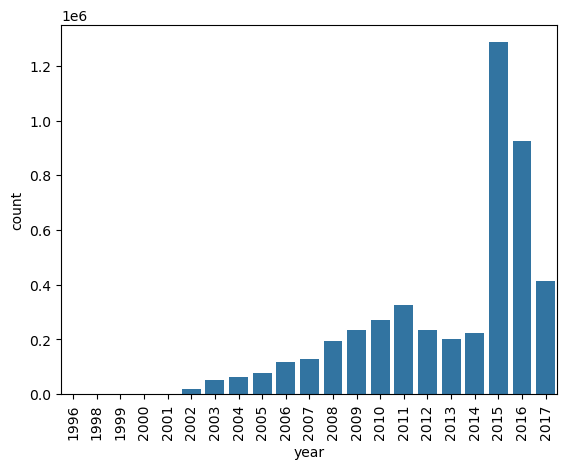

In [71]:
ax=sns.countplot(data=breweries_ratings, x='year')
plt.xticks(rotation=90)
plt.xlim()

In [75]:
#consider the years from 2006 to 2017, the 10 years when beeradvocate was most in vogue
breweries_ratings=breweries_ratings[(breweries_ratings['year']<=2017) & (breweries_ratings['year']>=2006) ]

In [76]:
#let's a the distribution of the number of reviews per year

(-0.5, 11.5)

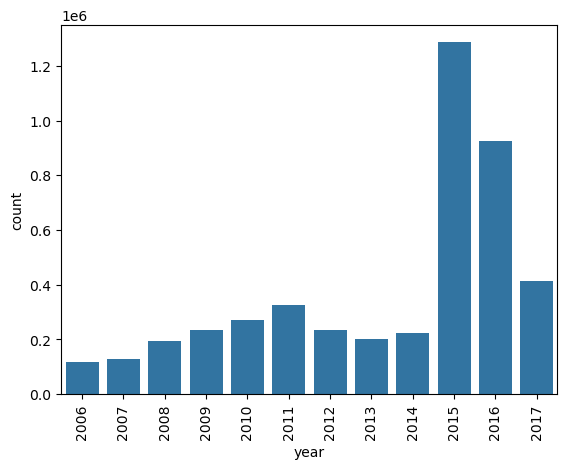

In [77]:
ax=sns.countplot(data=breweries_ratings, x='year')
plt.xticks(rotation=90)
plt.xlim()

In [78]:
#create a datframe with for each year, total reviews and total_reviews previuous year, we will need it later
reviews_per_year=breweries_ratings.groupby('year')['user_id'].agg(['size'])
reviews_per_year=reviews_per_year.reset_index()
reviews_per_year.columns=['year', 'tot_ratings']
reviews_per_year['tot_ratings_prev_year'] = reviews_per_year['tot_ratings'].shift(+1)
reviews_per_year

,year,tot_ratings,tot_ratings_prev_year
0,2006,116197,NaN
1,2007,128739,116197.0
2,2008,194851,128739.0
3,2009,233241,194851.0
4,2010,270958,233241.0
5,2011,327138,270958.0
6,2012,233390,327138.0
7,2013,201766,233390.0
8,2014,224832,201766.0
9,2015,1286137,224832.0


In [79]:
#let's see the reviews per user
breweries_ratings_group_user = breweries_ratings.groupby(['user_id', 'year'])['user_name'].agg(['size'])
breweries_ratings_group_user['size'].describe()

count    170810.000000
mean         26.660518
std          83.001804
min           1.000000
25%           1.000000
50%           3.000000
75%          13.000000
max        3833.000000
Name: size, dtype: float64

In [80]:
breweries_ratings_group_user

size
user_id                year      
-----kiki-----.1000245 2015     2
---.940711             2015     3
--dida--.1042029       2015     3
--dom--.709199         2012     1
                       2013    30
...                           ...
zzavela.1143039        2016    16
                       2017     4
zzombie.658444         2012     1
zzyzx.174143           2011     1
zzznumb.1062846        2015     3

[170810 rows x 1 columns]

<Axes: xlabel='size', ylabel='Count'>

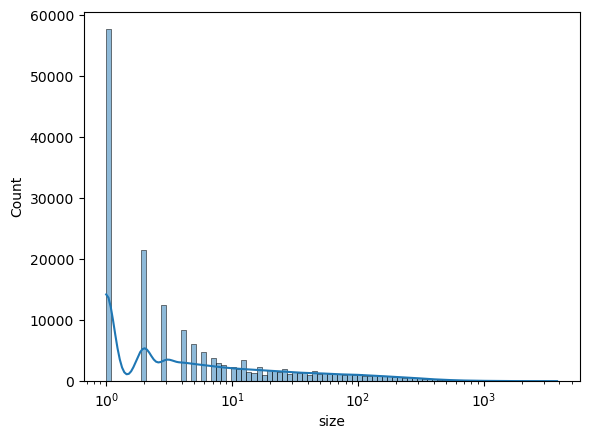

In [81]:
sns.histplot(breweries_ratings_group_user['size'], kde=True, log_scale=True)

from the statistics we can see that there is some user that is giving fake review

In [525]:
breweries_ratings_group_user=breweries_ratings_group_user.reset_index()

In [526]:
#let's define a fake_user a user that in a year has given more than 365 reviews

fake_user=breweries_ratings_group_user[breweries_ratings_group_user['size']>1000]['user_id']
fake_user.value_counts()

user_id
stonedtrippin.601042      6
uclabrewn84.439438        4
womencantsail.222552      3
superspak.456300          3
metter98.95017            2
chinchill.199175          2
thorpe429.243272          2
tmoney2591.322390         1
stevoj.638668             1
sabtos.1081399            1
rodbeermunch.1073239      1
rifugium.304205           1
pat61.545285              1
mora2000.164611           1
mikesgroove.104485        1
agentzero.351054          1
beerthulhu.186652         1
liquidamber.300837        1
kylehay2004.571365        1
knapp85.408506            1
jrallen34.346085          1
jdv.174727                1
hopdog.9038               1
dsa7783.168510            1
drabmuh.4791              1
dbrauneis.177736          1
ciocanelu.691982          1
chaingangguy.8942         1
lone_freighter.1202198    1
Name: count, dtype: int64

In [527]:
#let's see the reviews from this users
ratings_BA['abv'].describe()

count    2.523603e+06
mean     7.196049e+00
std      2.386648e+00
min      1.000000e-02
25%      5.400000e+00
50%      6.700000e+00
75%      8.500000e+00
max      6.750000e+01
Name: abv, dtype: float64

In [528]:
suspect= ratings_BA[ratings_BA["user_id"]=="stonedtrippin.601042"]
suspect['overall'].describe()

count    8846.000000
mean        3.900322
std         0.416949
min         1.000000
25%         3.750000
50%         4.000000
75%         4.250000
max         5.000000
Name: overall, dtype: float64

group reviews by brewery ID and year and calculate the number of reviews and the average number of reviews per brewery and year

In [82]:
breweries_ratings_grouped = breweries_ratings.groupby(['brewery_id', 'year'])['overall'].agg(['size', 'mean'])
columns_name=['n_reviews', 'mean_overall']
breweries_ratings_grouped.columns=columns_name

In [83]:
breweries_ratings_grouped.head()

n_reviews  mean_overall
brewery_id year                         
1          2006        107      3.747664
           2007        142      3.964789
           2008        147      3.884354
           2009        142      3.889085
           2010        172      3.904070

In [531]:
#some statistics about n_reviews per year

In [84]:
breweries_ratings_grouped['n_reviews'].describe()

count    56579.000000
mean        80.487160
std        468.161942
min          1.000000
25%          2.000000
50%          7.000000
75%         28.000000
max      23199.000000
Name: n_reviews, dtype: float64

<Axes: xlabel='n_reviews', ylabel='Count'>

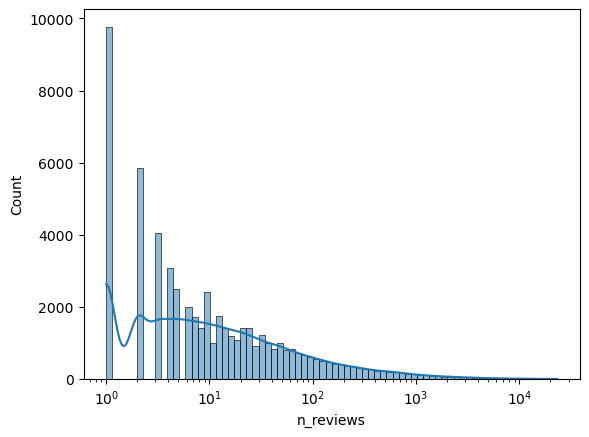

In [85]:
sns.histplot(breweries_ratings_grouped['n_reviews'], kde=True, log_scale=True)

here we want to study the analysis between the appreciation of a beer through reviews and the popularity of a beer (number of reviews) in the following year. we are making an assumption: the number of reviews is an indication of the popularity of the brewery. to make this assumption as true as possible, we only consider breweries with a certain number of reviews per year, i.e. breweries where users are used to leaving reviews



In [86]:
breweries_ratings_grouped.head(10)

n_reviews  mean_overall
brewery_id year                         
1          2006        107      3.747664
           2007        142      3.964789
           2008        147      3.884354
           2009        142      3.889085
           2010        172      3.904070
           2011        151      3.594371
           2012         91      3.703297
           2013         77      3.798701
           2014        107      3.806075
           2015        515      3.639806

In [87]:
#delete breweries with less than 19 reviews per year
invalid_breweries = breweries_ratings_grouped[breweries_ratings_grouped['n_reviews']<19].index
invalid_breweries=invalid_breweries.map(lambda x: x[0])
invalid_breweries=list(set(invalid_breweries))

In [88]:
breweries_ratings_grouped=breweries_ratings_grouped.reset_index()

In [89]:

breweries_ratings_grouped=breweries_ratings_grouped[~breweries_ratings_grouped['brewery_id'].isin(invalid_breweries)]

In [90]:
breweries_ratings_grouped

,brewery_id,year,n_reviews,mean_overall
0,1,2006,107,3.747664
1,1,2007,142,3.964789
2,1,2008,147,3.884354
3,1,2009,142,3.889085
4,1,2010,172,3.904070
...,...,...,...,...
56344,49107,2017,30,4.316667
56434,49334,2017,21,3.690476
56459,49404,2017,31,4.104839
56494,49534,2017,103,4.252427


In [91]:
#let's how many breweries remaining 
len(breweries_ratings_grouped['brewery_id'].unique())

952

In [540]:
#add column referring to the mean overall for the previous year, and the number of reviews of previous year

In [92]:
breweries_ratings_grouped['mean_overall_prev_year']=breweries_ratings_grouped.groupby('brewery_id')['mean_overall'].shift(1)

In [93]:
breweries_ratings_grouped['n_reviews_prev_year']=breweries_ratings_grouped.groupby('brewery_id')['n_reviews'].shift(1)

In [94]:
#merge in order to add columns tot ratings in beeradvocate in that year, and tot_ rating in beer_advocate the previous year
breweries_ratings_grouped=pd.merge(breweries_ratings_grouped, reviews_per_year, left_on='year', right_on='year')

In [95]:
breweries_ratings_grouped.head(15)

,brewery_id,year,n_reviews,mean_overall,mean_overall_prev_year,n_reviews_prev_year,tot_ratings,tot_ratings_prev_year
0,1,2006,107,3.747664,NaN,NaN,116197,NaN
1,1,2007,142,3.964789,3.747664,107.0,128739,116197.0
2,1,2008,147,3.884354,3.964789,142.0,194851,128739.0
3,1,2009,142,3.889085,3.884354,147.0,233241,194851.0
4,1,2010,172,3.904070,3.889085,142.0,270958,233241.0
5,1,2011,151,3.594371,3.904070,172.0,327138,270958.0
6,1,2012,91,3.703297,3.594371,151.0,233390,327138.0
7,1,2013,77,3.798701,3.703297,91.0,201766,233390.0
8,1,2014,107,3.806075,3.798701,77.0,224832,201766.0
9,1,2015,515,3.639806,3.806075,107.0,1286137,224832.0


In [96]:
#delete rows referrring to the first year of each brewerie, where we don' have the mean_overall of previous year
breweries_ratings_grouped = breweries_ratings_grouped.dropna(subset=['n_reviews_prev_year', 'mean_overall_prev_year'])

In [97]:
breweries_ratings_grouped.head(15)

,brewery_id,year,n_reviews,mean_overall,mean_overall_prev_year,n_reviews_prev_year,tot_ratings,tot_ratings_prev_year
1,1,2007,142,3.964789,3.747664,107.0,128739,116197.0
2,1,2008,147,3.884354,3.964789,142.0,194851,128739.0
3,1,2009,142,3.889085,3.884354,147.0,233241,194851.0
4,1,2010,172,3.904070,3.889085,142.0,270958,233241.0
5,1,2011,151,3.594371,3.904070,172.0,327138,270958.0
6,1,2012,91,3.703297,3.594371,151.0,233390,327138.0
7,1,2013,77,3.798701,3.703297,91.0,201766,233390.0
8,1,2014,107,3.806075,3.798701,77.0,224832,201766.0
9,1,2015,515,3.639806,3.806075,107.0,1286137,224832.0
10,1,2016,312,3.631410,3.639806,515.0,924219,1286137.0


we want to study the percentage increase or decrease in the number of reviews
compared to the previous year, so we add the columns delta_num_reveiws referring to the percentage increase of reviews for a breweirie in a certain year respect to the year before, and delta_num_tot_reviews, i.e the percentage increase of the total number of review on beer_advocate in that year, respect to the year before

In [98]:
breweries_ratings_grouped['delta_num_reviews']=100*(breweries_ratings_grouped['n_reviews']-breweries_ratings_grouped['n_reviews_prev_year'])/breweries_ratings_grouped['n_reviews_prev_year']
breweries_ratings_grouped['delta_num_tot_reviews']=100*(breweries_ratings_grouped['tot_ratings']-breweries_ratings_grouped['tot_ratings_prev_year']) / breweries_ratings_grouped['tot_ratings_prev_year']

In [99]:
stats.pearsonr(breweries_ratings_grouped['mean_overall_prev_year'],breweries_ratings_grouped['delta_num_reviews'])

PearsonRResult(statistic=0.09155839136344589, pvalue=4.59244579227247e-12)

very good statistic !!

In [100]:
breweries_ratings_grouped.head(15)

,brewery_id,year,n_reviews,mean_overall,mean_overall_prev_year,n_reviews_prev_year,tot_ratings,tot_ratings_prev_year,delta_num_reviews,delta_num_tot_reviews
1,1,2007,142,3.964789,3.747664,107.0,128739,116197.0,32.710280,10.793738
2,1,2008,147,3.884354,3.964789,142.0,194851,128739.0,3.521127,51.353514
3,1,2009,142,3.889085,3.884354,147.0,233241,194851.0,-3.401361,19.702234
4,1,2010,172,3.904070,3.889085,142.0,270958,233241.0,21.126761,16.170828
5,1,2011,151,3.594371,3.904070,172.0,327138,270958.0,-12.209302,20.733841
6,1,2012,91,3.703297,3.594371,151.0,233390,327138.0,-39.735099,-28.657019
7,1,2013,77,3.798701,3.703297,91.0,201766,233390.0,-15.384615,-13.549852
8,1,2014,107,3.806075,3.798701,77.0,224832,201766.0,38.961039,11.432055
9,1,2015,515,3.639806,3.806075,107.0,1286137,224832.0,381.308411,472.043570
10,1,2016,312,3.631410,3.639806,515.0,924219,1286137.0,-39.417476,-28.139926


we want to consider's some outliers, for example those with a percentage increase respect to the previous year grater that 3 * std_dev

<Axes: xlabel='delta_num_reviews', ylabel='Count'>

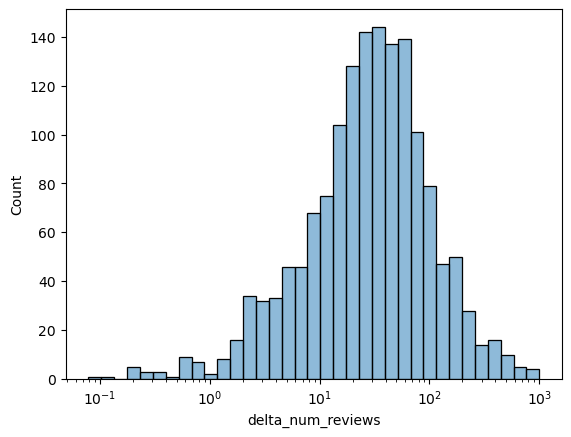

In [550]:
#let's first consider the distribution
sns.histplot(breweries_ratings_grouped['delta_num_reviews'],kde=True, log_scale=True )

In [551]:
breweries_ratings_grouped['delta_num_reviews'].describe()

count    3436.000000
mean        9.590688
std        77.577249
min       -81.699346
25%       -30.613823
50%        -5.354839
75%        25.000000
max      1005.263158
Name: delta_num_reviews, dtype: float64

In [101]:
min_treshold = breweries_ratings_grouped['delta_num_reviews'].mean() - breweries_ratings_grouped['delta_num_reviews'].std() *3 
max_treshold = breweries_ratings_grouped['delta_num_reviews'].mean() + breweries_ratings_grouped['delta_num_reviews'].std() * 3

In [102]:
print(min_treshold,  max_treshold)

-591.5845254697311 707.5205614845676


In [103]:
#remove outliers
breweries_ratings_grouped = breweries_ratings_grouped[(breweries_ratings_grouped['delta_num_reviews']>min_treshold) & (breweries_ratings_grouped['delta_num_reviews']<max_treshold)]

In [104]:
breweries_ratings_grouped

,brewery_id,year,n_reviews,mean_overall,mean_overall_prev_year,n_reviews_prev_year,tot_ratings,tot_ratings_prev_year,delta_num_reviews,delta_num_tot_reviews
1,1,2007,142,3.964789,3.747664,107.0,128739,116197.0,32.710280,10.793738
2,1,2008,147,3.884354,3.964789,142.0,194851,128739.0,3.521127,51.353514
3,1,2009,142,3.889085,3.884354,147.0,233241,194851.0,-3.401361,19.702234
4,1,2010,172,3.904070,3.889085,142.0,270958,233241.0,21.126761,16.170828
5,1,2011,151,3.594371,3.904070,172.0,327138,270958.0,-12.209302,20.733841
...,...,...,...,...,...,...,...,...,...,...
6586,47223,2017,205,4.109756,3.875000,66.0,412415,924219.0,210.606061,-55.376918
6590,47536,2017,383,4.263708,4.384615,52.0,412415,924219.0,636.538462,-55.376918
6592,47537,2017,46,3.918478,4.189655,29.0,412415,924219.0,58.620690,-55.376918
6622,48475,2016,51,4.029412,4.148649,37.0,924219,1286137.0,37.837838,-28.139926


In [105]:
len(breweries_ratings_grouped['brewery_id'].unique())

884

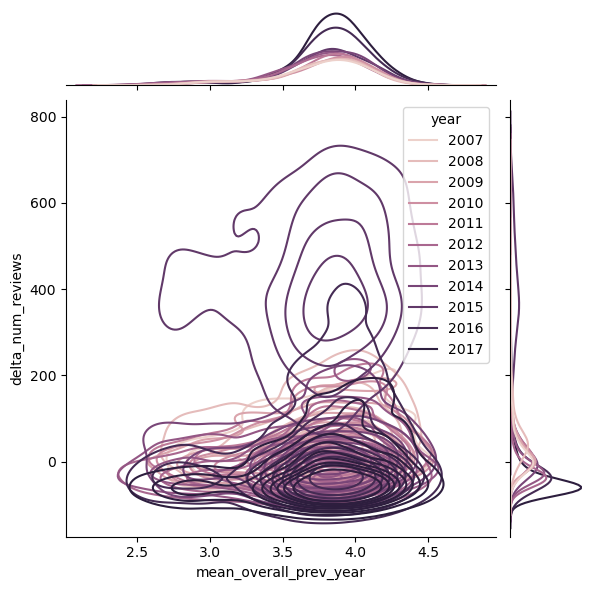

In [106]:

sns.jointplot(data = breweries_ratings_grouped, x = 'mean_overall_prev_year', y = 'delta_num_reviews', hue="year",kind="kde")

/opt/anaconda3/envs/ada/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


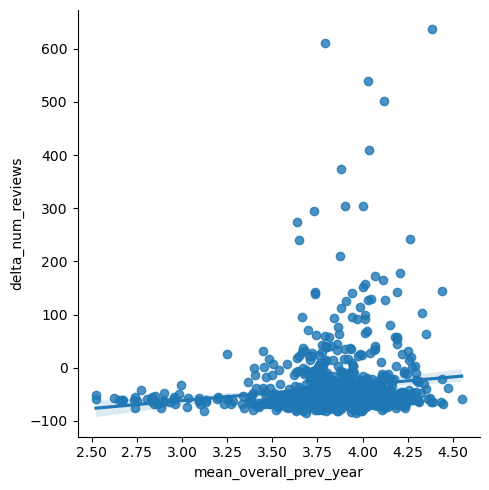

In [107]:
import ipywidgets as widgets
from ipywidgets import interact

def update_graph(year):
    # Filtra i dati per l'anno selezionato
    data = breweries_ratings_grouped[breweries_ratings_grouped['year'] == year]
    
    # Genera il grafico
    sns.lmplot(x='mean_overall_prev_year',y='delta_num_reviews', data=data)
    #sns.regplot(x=data["mean_overall_prev_year"], y=data["delta_num_reviews"], scatter_kws={'s': 10}, line_kws={'color': 'red'})    
    
    # Mostra il grafico

update_graph(2017)

In [108]:
stats.pearsonr(breweries_ratings_grouped['mean_overall_prev_year'],breweries_ratings_grouped['delta_num_reviews'])

PearsonRResult(statistic=0.06458572707557951, pvalue=1.3087476144522023e-06)

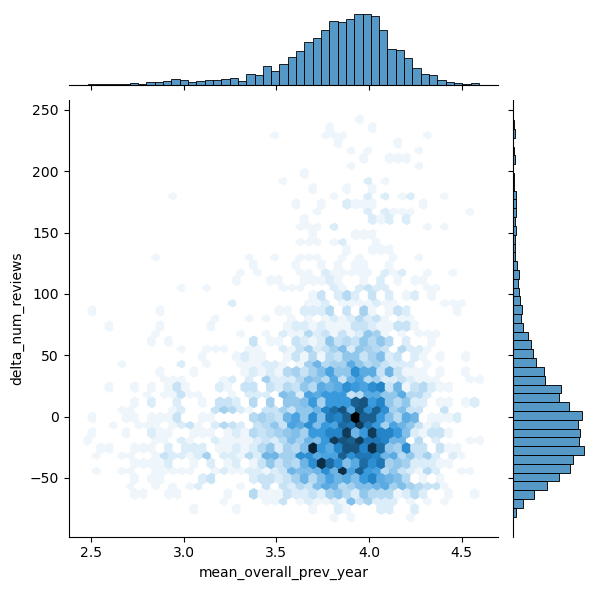

In [560]:
sns.jointplot(data=breweries_ratings_grouped, x="mean_overall_prev_year", y="delta_num_reviews", kind="hex")

In [109]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
#standardize
to_model=breweries_ratings_grouped.copy()
to_model['mean_overall_prev_year']=(to_model['mean_overall_prev_year']/to_model['mean_overall_prev_year'].mean())
mod = smf.ols(formula='delta_num_reviews ~ mean_overall_prev_year ', data=breweries_ratings_grouped)

In [110]:
np.random.seed(2)
res = mod.fit()

In [111]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      delta_num_reviews   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     23.46
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.31e-06
Time:                        18:43:27   Log-Likelihood:                -35663.
No. Observations:                5603   AIC:                         7.133e+04
Df Residuals:                    5601   BIC:                         7.134e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -62

In [586]:
#low R-squared, let's try adding other features, like delta_num_tot_reviews
to_model=breweries_ratings_grouped.copy()
to_model_dummies = pd.get_dummies(pd.cut(to_model['mean_overall_prev_year'], bins=[2, 3, 4, 5], right=False))
to_model_dummies.columns = [f'int_{i+1}' for i in range(to_model_dummies.shape[1])]
to_model = pd.concat([to_model, to_model_dummies], axis=1)
#to_model['new_input']=to_model['mean_overall_prev_year']*to_model['delta_num_tot_reviews']
#to_model['new_input']=(to_model['new_input']/to_model['new_input'].mean())/to_model['new_input'].std()
to_model['mean_overall_prev_year']=(to_model['mean_overall_prev_year']/to_model['mean_overall_prev_year'].mean())
#to_model['tot_ratings']=(to_model['tot_ratings']/to_model['tot_ratings'].mean())/to_model['tot_ratings'].std()
to_model['delta_num_tot_reviews']=(to_model['delta_num_tot_reviews']/to_model['delta_num_tot_reviews'].mean())/to_model['delta_num_tot_reviews'].std()

mod = smf.ols(formula='delta_num_reviews ~ mean_overall_prev_year + delta_num_tot_reviews', data=to_model)

In [587]:
np.random.seed(2)
res = mod.fit()

In [588]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      delta_num_reviews   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     774.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          1.85e-277
Time:                        16:43:41   Log-Likelihood:                -17292.
No. Observations:                3378   AIC:                         3.459e+04
Df Residuals:                    3375   BIC:                         3.461e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -45

In [478]:
#good R-squared !!!
#let's see the distribution of the features


<Axes: xlabel='mean_overall_prev_year', ylabel='Count'>

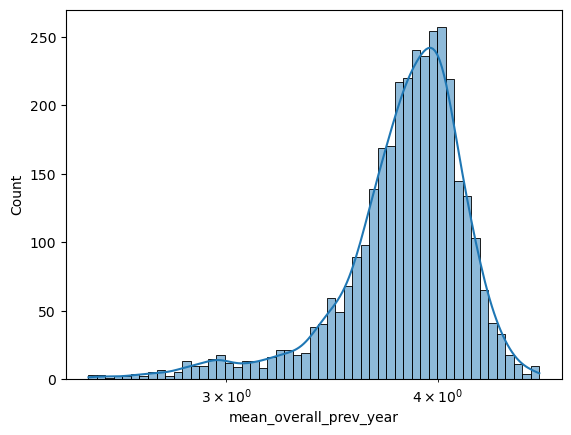

In [479]:
sns.histplot(breweries_ratings_grouped['mean_overall_prev_year'],kde=True, log_scale=True )

In [480]:
#since mean_overall_prev_year follows a normal distribution it's a good practice to standardize the feature

<Axes: xlabel='delta_num_tot_reviews', ylabel='Count'>

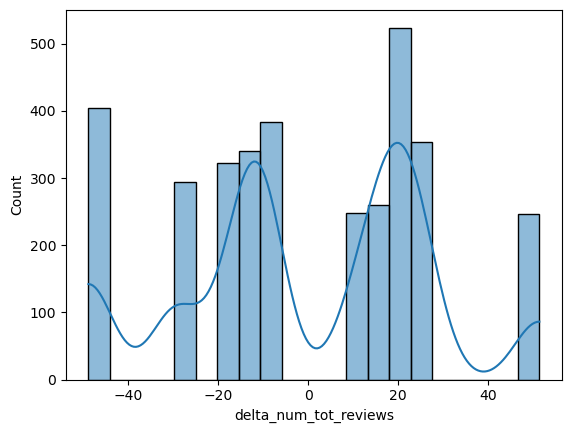

In [481]:
sns.histplot(breweries_ratings_grouped['delta_num_tot_reviews'],kde=True )

In [482]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [483]:
breweries_ratings_grouped['mean_overall_prev_year'].min()

2.486588306208559

In [484]:
to_model=breweries_ratings_grouped.copy()
to_model_dummies = pd.get_dummies(pd.cut(to_model['mean_overall_prev_year'], bins=[2, 2.5, 3, 3.5, 4, 4.5, 5], right=False))
to_model_dummies.columns = [f'int_{i+1}' for i in range(to_model_dummies.shape[1])]
to_model = pd.concat([to_model, to_model_dummies], axis=1)
to_model

,brewery_id,year,n_reviews,mean_overall,mean_overall_prev_year,n_reviews_prev_year,tot_ratings,tot_ratings_prev_year,delta_num_reviews,delta_num_tot_reviews,int_1,int_2,int_3,int_4,int_5,int_6
1,1,2007,142,3.964789,3.747664,107.0,128743,116197.0,32.710280,10.797181,False,False,False,True,False,False
2,1,2008,147,3.884354,3.964789,142.0,194847,128743.0,3.521127,51.345704,False,False,False,True,False,False
3,1,2009,142,3.889085,3.884354,147.0,233241,194847.0,-3.401361,19.704691,False,False,False,True,False,False
4,1,2010,173,3.904070,3.889085,142.0,270954,233241.0,21.830986,16.169113,False,False,False,True,False,False
5,1,2011,150,3.591667,3.904070,173.0,326499,270954.0,-13.294798,20.499790,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,44858,2017,154,4.128247,4.158451,71.0,99300,193895.0,116.901408,-48.786714,False,False,False,False,True,False
3846,44994,2017,31,4.604839,4.330000,25.0,99300,193895.0,24.000000,-48.786714,False,False,False,False,True,False
3848,45496,2017,161,4.175466,4.404459,157.0,99300,193895.0,2.547771,-48.786714,False,False,False,False,True,False
3851,45975,2017,93,4.231183,4.330357,28.0,99300,193895.0,232.142857,-48.786714,False,False,False,False,True,False


Text(0, 0.5, 'Predicted')

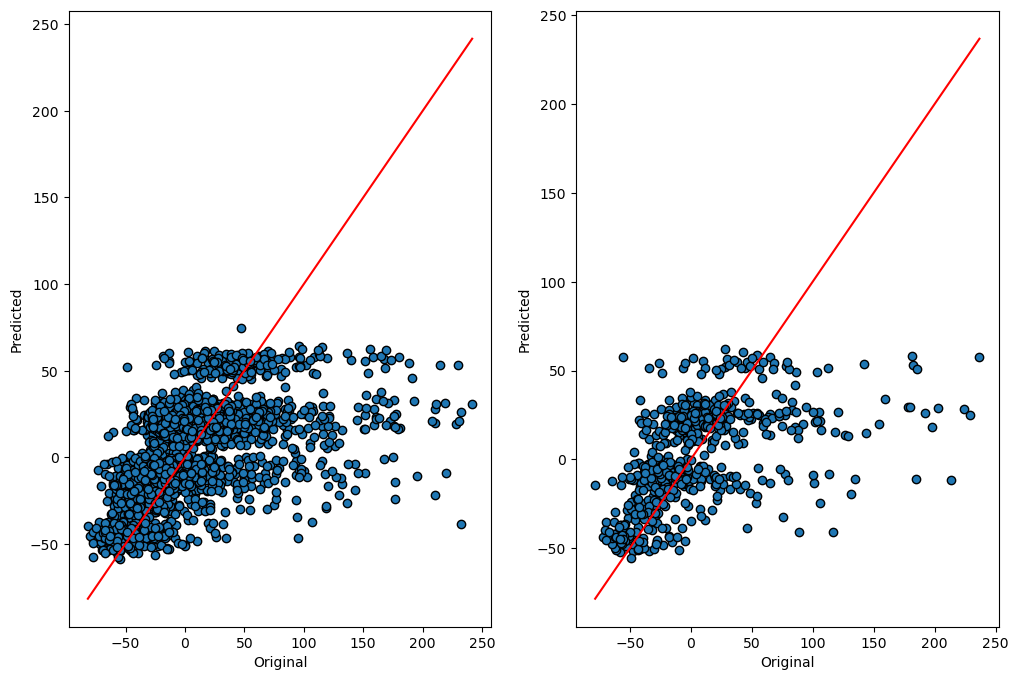

In [485]:
feature_cols=['mean_overall_prev_year', 'delta_num_tot_reviews', 'int_1', 'int_2', 'int_3', 'int_4', 'int_5',]

to_model['mean_overall_prev_year']=(to_model['mean_overall_prev_year']/to_model['mean_overall_prev_year'].mean())
to_model['delta_num_tot_reviews']=(to_model['delta_num_tot_reviews']/to_model['delta_num_tot_reviews'].mean())/to_model['delta_num_tot_reviews'].std()
to_model['augment_1']=to_model['mean_overall_prev_year']  ** 2
to_model['augment_2']=to_model['mean_overall_prev_year']  ** 3
train = to_model.sample(frac=0.8)
test = to_model.drop(train.index)

X_train = train[feature_cols]
X_test = test[feature_cols]
y_train = train['delta_num_reviews']
y_test= test['delta_num_reviews']

lr=LinearRegression()
predicted_train = cross_val_predict(lr, X_train, y_train, cv=5)

lr.fit(X_train, y_train)

# Predizione su X_test
predicted_test = lr.predict(X_test)

# Calcolo del MSE su X_test
test_mse = mean_squared_error(y_test, predicted_test)
train_mse = mean_squared_error(y_train, predicted_train)

# Plot the results
fig, ax = plt.subplots(1,2,figsize=(12, 8))
ax[0].scatter(y_train, predicted_train, edgecolors=(0, 0, 0))
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="red")
ax[0].set_xlabel('Original')
ax[0].set_ylabel('Predicted')



ax[1].scatter(y_test, predicted_test, edgecolors=(0, 0, 0))
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
ax[1].set_xlabel('Original')
ax[1].set_ylabel('Predicted')


In [486]:
print(lr.coef_)

[ 78.0369453  -18.02891547  36.7728744   12.21157101   1.50952593
  -3.25274613  -3.68816566]


In [487]:
print(test_mse)
print(train_mse)

1775.9668010686364
1603.880714296442


In [ ]:
#correlation between the number of styles a breweries offer and it's popularity 

(-0.5, 103.5)

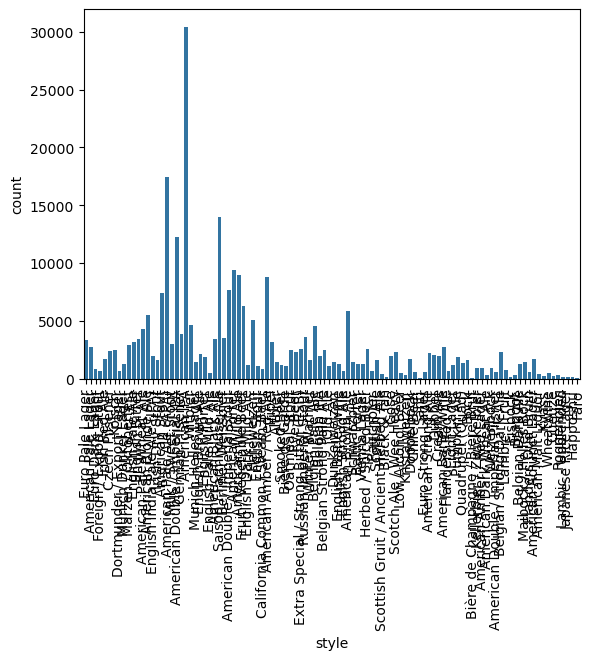

In [615]:
ax=sns.countplot(data=beer_BA, x='style')
plt.xticks(rotation=90)
plt.xlim()

In [607]:
all_styles = beer_BA['style'].value_counts().index

In [608]:
all_styles = list(all_styles)
all_styles


['American IPA',
 'American Pale Ale (APA)',
 'Saison / Farmhouse Ale',
 'American Double / Imperial IPA',
 'American Porter',
 'American Wild Ale',
 'American Amber / Red Ale',
 'American Double / Imperial Stout',
 'American Stout',
 'Fruit / Vegetable Beer',
 'American Brown Ale',
 'American Blonde Ale',
 'Hefeweizen',
 'Witbier',
 'Belgian Pale Ale',
 'American Pale Wheat Ale',
 'German Pilsener',
 'Russian Imperial Stout',
 'Berliner Weissbier',
 'American Black Ale',
 'English Bitter',
 'Euro Pale Lager',
 'English Pale Ale',
 'Tripel',
 'Milk / Sweet Stout',
 'Märzen / Oktoberfest',
 'American Barleywine',
 'American Pale Lager',
 'Herbed / Spiced Beer',
 'Extra Special / Strong Bitter (ESB)',
 'Oatmeal Stout',
 'Belgian Strong Pale Ale',
 'Kölsch',
 'Czech Pilsener',
 'Belgian Strong Dark Ale',
 'Scotch Ale / Wee Heavy',
 'Rye Beer',
 'American Strong Ale',
 'English Brown Ale',
 'Dubbel',
 'English India Pale Ale (IPA)',
 'Gose',
 'Cream Ale',
 'Belgian IPA',
 'Pumpkin Ale',
 '

In [616]:
all_styles.count('Bière Brut')

0

In [617]:
breweries_BA

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
16753,128,Germany,Privatbrauerei Franz Joseph Sailer,6
16754,5023,Aruba,Aruba Brewing,0
16755,1573,"United States, New York",John Harvard’s Brewery & Ale House,491
16756,16186,"United States, North Carolina",Triangle Brewing Company,20
